# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Friday, October 24, 2025, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a multilayer perceptron (MLP).

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  

> Good luck, comrade!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a multilayer perceptron (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering.
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Improve performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning hyperparameters.

> Note: There are no restrictions on the tricks you can use — Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How can you make sure the results are reproduable?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between SGD and Adam.
   - Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.

In [2]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

In [3]:
# split the dataset 
X_train = train[["x0", "x1"]]
y_train = train["y"]

X_test= test[["x0", "x1"]]
y_test= test["y"]

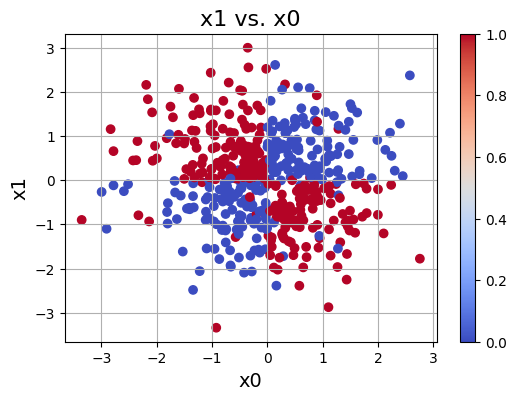

In [4]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()
plt.show()

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
import random

# Ensure reproducibility by setting seeds
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()

#### Implementation using a Learning Rate Scheduler

In [6]:
from lr_schedule import LearningRateScheduler

lr_schedule = LearningRateScheduler(
    lr_min=1e-5,
    lr_max=1e-2,
    warmup_steps=100,
    total_steps=500
)

optimizer = Adam(learning_rate=lr_schedule)

model = Sequential(
        [
            Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ]
    )

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test,y_test),
)



Epoch 1/20


c:\Users\sjave\Desktop\Assignment2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5480 - loss: 0.6898 - val_accuracy: 0.8100 - val_loss: 0.6615
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8580 - loss: 0.6217 - val_accuracy: 0.8900 - val_loss: 0.5597
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8920 - loss: 0.4836 - val_accuracy: 0.8840 - val_loss: 0.3911
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8980 - loss: 0.3531 - val_accuracy: 0.9060 - val_loss: 0.3348
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9080 - loss: 0.3334 - val_accuracy: 0.9120 - val_loss: 0.3272
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9060 - loss: 0.3246 - val_accuracy: 0.8960 - val_loss: 0.3331
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8960 - loss: 0.3237 - val_accuracy: 0.8960 - val_loss: 0.3396
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8920 - loss: 0.3229 - val_accuracy: 0.8740 - val_loss: 0.35

In [7]:
print(f"Validation accuracy: {history.history['val_accuracy'][-1]:.4}")
print(f"Validation loss: {history.history['val_loss'][-1]:.4}")


Validation accuracy: 0.902
Validation loss: 0.2853


#### Hyperparameter tuning using GridSeachCV

In [3]:
from sklearn.model_selection import GridSearchCV 
from scikeras.wrappers import KerasClassifier

In [9]:
def create_model(lr_min, lr_max, warmup_steps, total_steps):
    lr_schedule = LearningRateScheduler(
        lr_min=lr_min, lr_max=lr_max,
        warmup_steps=warmup_steps,
        total_steps=total_steps
    )
    model = Sequential(
        [
            Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ]
    )
    optimizer = Adam(learning_rate=lr_schedule)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [10]:
params = {
    'model__lr_min': [1e-4, 1e-3],
    'model__lr_max': [1e-2, 1e-1],
    'model__warmup_steps': [10, 100, 1000],
    'model__total_steps': [100, 1000],
    'epochs': [50, 100]
}

# Wrap the model to make it useable for GridSearchCV
model = KerasClassifier(
    model=create_model,
    verbose=0
)
    
grid= GridSearchCV(
    estimator=model,
    param_grid=params,
    n_jobs=-1,
    cv=3
)

grid_search = grid.fit(X_train, y_train)

c:\Users\sjave\Desktop\Assignment2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
print(f"Best score: {grid_search.best_score_:.4}")
print(f"Best params: {grid_search.best_params_}")

Best score: 0.934
Best params: {'epochs': 50, 'model__lr_max': 0.01, 'model__lr_min': 0.001, 'model__total_steps': 1000, 'model__warmup_steps': 10}


#### Train the model using the best parameters


In [12]:
best_params = grid_search.best_params_
lr_best = LearningRateScheduler(
    lr_min=best_params['model__lr_min'],
    lr_max=best_params['model__lr_max'],
    warmup_steps=best_params['model__warmup_steps'],
    total_steps=best_params['model__total_steps']
)

best_model = Sequential(
        [
            Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ]
    )
optimizer = Adam(learning_rate=lr_best)

best_model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

best_history = best_model.fit(
    X_train, y_train,
    epochs=best_params['epochs'],
    batch_size=32,
    validation_data=(X_test, y_test)

)

Epoch 1/50


c:\Users\sjave\Desktop\Assignment2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7960 - loss: 0.6052 - val_accuracy: 0.8680 - val_loss: 0.4196
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8960 - loss: 0.3667 - val_accuracy: 0.9180 - val_loss: 0.3252
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8980 - loss: 0.3364 - val_accuracy: 0.8880 - val_loss: 0.3343
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9040 - loss: 0.3228 - val_accuracy: 0.8840 - val_loss: 0.3461
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9220 - loss: 0.3098 - val_accuracy: 0.8880 - val_loss: 0.3281
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9140 - loss: 0.3008 - val_accuracy: 0.9060 - val_loss: 0.3158
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9120 - loss: 0.2981 - val_accuracy: 0.8980 - val_loss: 0.3084
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9160 - loss: 0.2930 - val_accuracy: 0.9020 - val_loss: 0.3043


In [13]:
print(f"Best score: {best_history.history['val_accuracy'][-1]:.4f}")

Best score: 0.9200


#### Without learning rate scheduler

In [14]:
optimizer_no_lr = Adam()

model_no_lr = best_model

model_no_lr.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
)

history_no_lr= model_no_lr.fit(
    X_train, y_train,
    epochs=best_params['epochs'],
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9480 - loss: 0.1708 - val_accuracy: 0.9200 - val_loss: 0.2603
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9480 - loss: 0.1701 - val_accuracy: 0.9180 - val_loss: 0.2599
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9480 - loss: 0.1696 - val_accuracy: 0.9200 - val_loss: 0.2603
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9480 - loss: 0.1688 - val_accuracy: 0.9180 - val_loss: 0.2607
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9480 - loss: 0.1684 - val_accuracy: 0.9200 - val_loss: 0.2603
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9480 - loss: 0.1681 - val_accuracy: 0.9200 - val_loss: 0.2598
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9480 - loss: 0.1676 - val_accuracy: 0.9200 - val_loss: 0.2601
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9480 - loss: 0.1672 - val_accuracy: 0.9200 - val_loss

In [15]:

print(f"Score with LR: {best_history.history['val_accuracy'][-1]:.4f}")
print(f"Score without LR: {history_no_lr.history['val_accuracy'][-1]:.4f}")

Score with LR: 0.9200
Score without LR: 0.9120


#### Learning rate curve plot


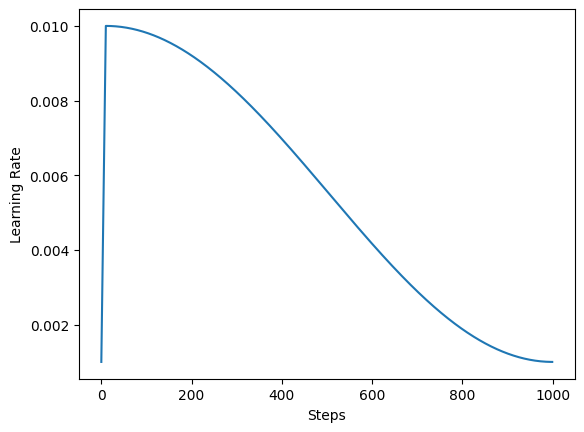

In [16]:
steps = np.arange(0,best_params['model__total_steps'])


lr_to_plot = [lr_best(step) for step in steps]
plt.plot(steps, lr_to_plot)
plt.xlabel("Steps")
plt.ylabel("Learning Rate")
plt.show()

#### Decision Boundary

In [ ]:
# Reusing this function from my Assignment 1 submission
def plot_decision_boundary(model, X, y):
    x_min, x_max = X["x0"].min() - 1, X["x0"].max() + 1
    y_min, y_max = X["x1"].min() - 1, X["x1"].max() + 1

    x_grid, y_grid = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    # flatten grid into shape (N,2)
    grid = np.c_[x_grid.ravel(), y_grid.ravel()]
    grid_df = pd.DataFrame(grid, columns=["x0", "x1"])


    # predict on grid
    Z = np.array(model.predict(grid_df))
    Z = Z.reshape(x_grid.shape)

    # plot decision boundary
    plt.figure(figsize=(10,8))
    plt.contourf(x_grid, y_grid, Z,alpha=0.3, cmap="bwr")
    plt.scatter(X["x0"], X["x1"], c=y, cmap="bwr", edgecolors="k", alpha=0.7)
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step


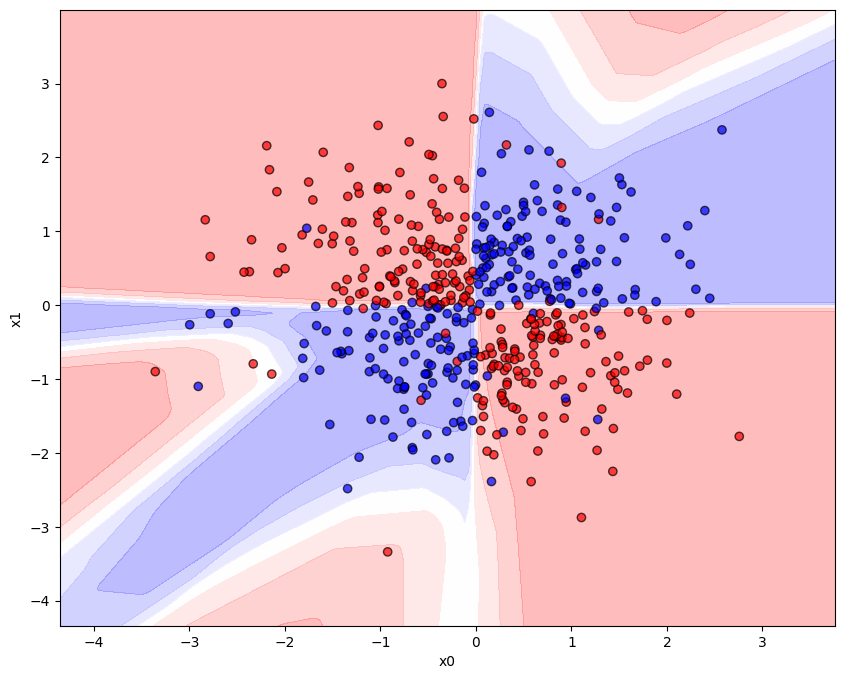

In [19]:
plot_decision_boundary(best_model, X_train, y_train)

#### Discussion
- **How can you make sure the results are reproducable?**
We can try to make the results reproducable by setting a seed, to make the model more deteministic. I also added ```
tf.config.experimental.enable_op_determinism()```. According to the tensforflow documentation for this function, this enables all tensorflow ops to be deterministic, meaning that if the model gets the same input, it produces the same output regardless of how many times it is ran. 

- **Which optimizer did you choose? Discuss the differences between SGD and Adam.**
I chose to go with the Adam optimizer, due to the optimizers adaptive learning rate. The adaptive learning rate is the main difference between SGD and Adam. SGD uses a fixed learning rate, while Adam uses an adaptive learning rate, which should fit better since we're using a learning rate scheduler. 
- **Visualize the network's architecture and decision boundary.**
The decision boundary is plotted above. We generally see a good fit with the decision boundary, although some outliers are noticed. 
- **Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?**
The learning rate curve plot can be seen above. Based on the accuracies computed from the models without and with LR schedule, we saw that the model with LR schedule had a bit higher accuracy than the model without. 
In this case, I don't really think that the LR schedule contributed that much to the performance, which I think is due to the hyperparameters set. I think adding more hyperparameters options and running the GridSearchCV again, could possibly increase the performance. 

# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts.

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

In [7]:
# Hmmmmm, why is the first row skipped?
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)
data

,ID,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0,0.314365,0.646305,0.323849,0.238492,0.655790,0.646305,0.646305,0.409205,0.646305,...,0.646305,0.646305,0.655790,0.238492,0.646305,0.674758,0.646305,0.238492,0.655790,0.646305
1,1,0.587628,0.494976,0.559832,-0.246237,0.513506,0.550567,0.522772,0.596893,0.606158,...,0.587628,0.550567,0.587628,0.587628,0.550567,0.587628,0.550567,0.596893,0.494976,0.587628
2,2,0.590203,0.367673,0.367673,0.367673,0.367673,0.590203,0.367673,0.590203,0.590203,...,0.590203,0.367673,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.476556
3,3,0.589296,0.589296,0.579825,0.551415,0.579825,0.579825,0.608236,0.579825,0.646118,...,0.532474,0.523003,0.589296,0.589296,0.551415,0.134721,0.475652,0.589296,0.570355,0.551415
4,4,0.660095,0.470676,0.190366,0.672806,0.470761,0.672766,0.672652,0.666151,0.672987,...,0.432001,0.672222,0.190568,0.217329,0.633684,0.673294,0.587914,0.671023,0.207578,0.470765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.340739,0.340739,0.340739,0.681823,0.340739,0.340739,0.340739,0.672083,0.340739,...,0.340739,0.662355,0.340739,0.759779,0.331011,0.759779,0.340739,0.691563,0.340734,0.720789
3996,3996,0.384257,0.384257,0.675221,0.384257,0.384257,0.675221,0.384257,0.675221,0.675221,...,0.675221,0.384257,0.675221,0.675221,0.675221,0.384257,0.384257,0.384257,0.675221,0.675221
3997,3997,0.641837,0.651135,0.251329,0.251329,0.651135,0.651135,0.251329,0.651135,0.651135,...,0.251329,0.251329,0.651135,0.251329,0.409392,0.604646,0.651135,0.651135,0.660433,0.251329
3998,3998,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,-0.212897,0.555533,...,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533


In [8]:
# The dataset is heavy. Applying clustering directly on the dataset is likely not feasible. 
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16385 entries, ID to 16383
dtypes: float64(16384), int64(1)
memory usage: 500.0 MB


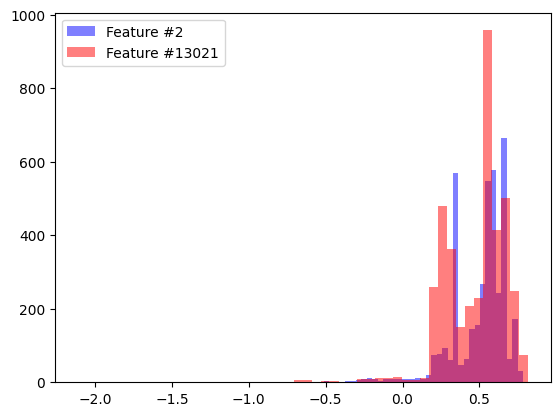

In [9]:
# Features seem to be similarly distributed...
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()
plt.show()

In [10]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster. 
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to. 
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,ID,cluster
0,0,2
1,1,6
2,2,3
3,3,3
4,4,8
...,...,...
3995,3995,3
3996,3996,7
3997,3997,3
3998,3998,7


In [37]:
# imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from umap import UMAP

In [ ]:
# Load data and check if we need to normalize it
data = pd.read_csv("unsupervised_data.csv", skiprows=1, header=None)
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)



In [ ]:
data.describe().T[['mean', 'std', 'min', 'max']]

,mean,std,min,max
ID,1999.500000,1154.844867,0.000000,3999.000000
0,0.504846,0.172451,-0.761782,0.777356
1,0.503492,0.180584,-0.967271,0.783487
2,0.497028,0.181790,-0.596542,0.785235
3,0.448618,0.238103,-2.052664,0.779715
...,...,...,...,...
16379,0.508781,0.162708,-0.583003,0.789371
16380,0.506159,0.165259,-1.410974,0.818482
16381,0.502525,0.171560,-0.900788,1.000000
16382,0.508608,0.179021,-1.083836,0.775181


In [33]:
# Looks like the ID column stands out so let's drop it.
data_ids = data['ID'].values    # store for later in case we need them
data_scaled = data.drop(columns=['ID']).values


#### PCA

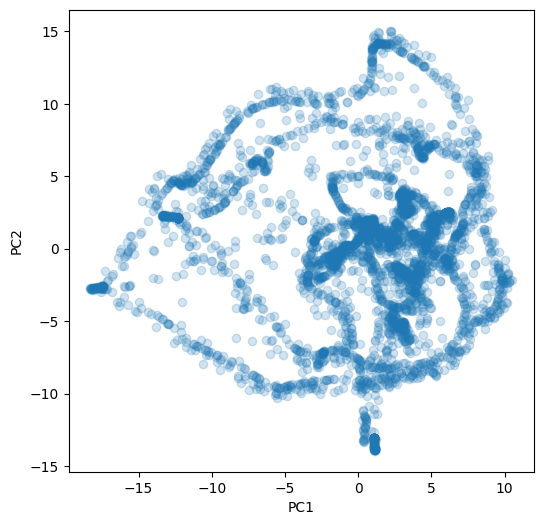

In [36]:
data_pca = PCA(n_components=2).fit_transform(data_scaled)


plt.figure(figsize=(6,6))
plt.scatter(x=data_pca[:,0], y=data_pca[:,1], alpha=0.2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### t-SNE

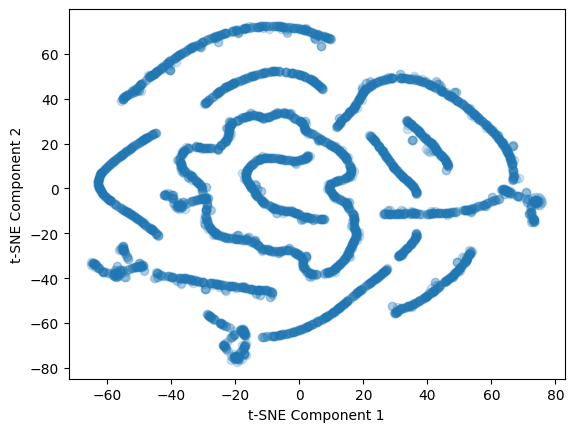

In [35]:
data_tsne = TSNE(
    n_components=2,
    random_state=seed,
    n_jobs=-1).fit_transform(data_scaled)

plt.scatter(data_tsne[:, 0], data_tsne[:,1], alpha=0.2)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


#### UMAP

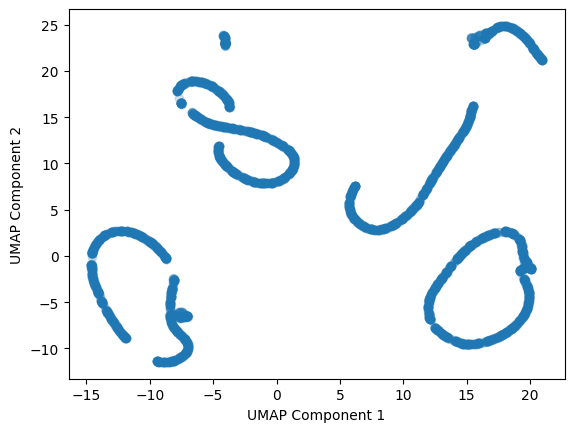

In [38]:
data_umap = UMAP(n_components=2).fit_transform(data_scaled)

plt.scatter(data_umap[:,0], data_umap[:,1], alpha=0.2)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()


---

## 🎯 Note: Clustering Accuracy Evaluation

The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation is solely based on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [16]:
import numpy as np
import scipy.optimize
import sklearn.metrics

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy

In [17]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(1.0)

In [18]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.3333333333333333)

In [19]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.5)